In [1]:
import json

from src.constants import DATA_PATH

In [2]:
pt = json.load((DATA_PATH / 'pt.json').open('r'))
print("Number of entries in pt.json:", len(pt))

Number of entries in pt.json: 34157


In [3]:
texts = list(pt.values())
print("Number of unique texts in pt.json:", len(set(texts)))

Number of unique texts in pt.json: 34157


So we know that the dataset is composed of distinct texts.

In [4]:
# plot the most frequent words
from collections import Counter
import nltk

stopwords = nltk.corpus.stopwords.words('portuguese')
words = [word for text in texts for word in text.lower().split() if word not in stopwords]
word_counts = Counter(words)


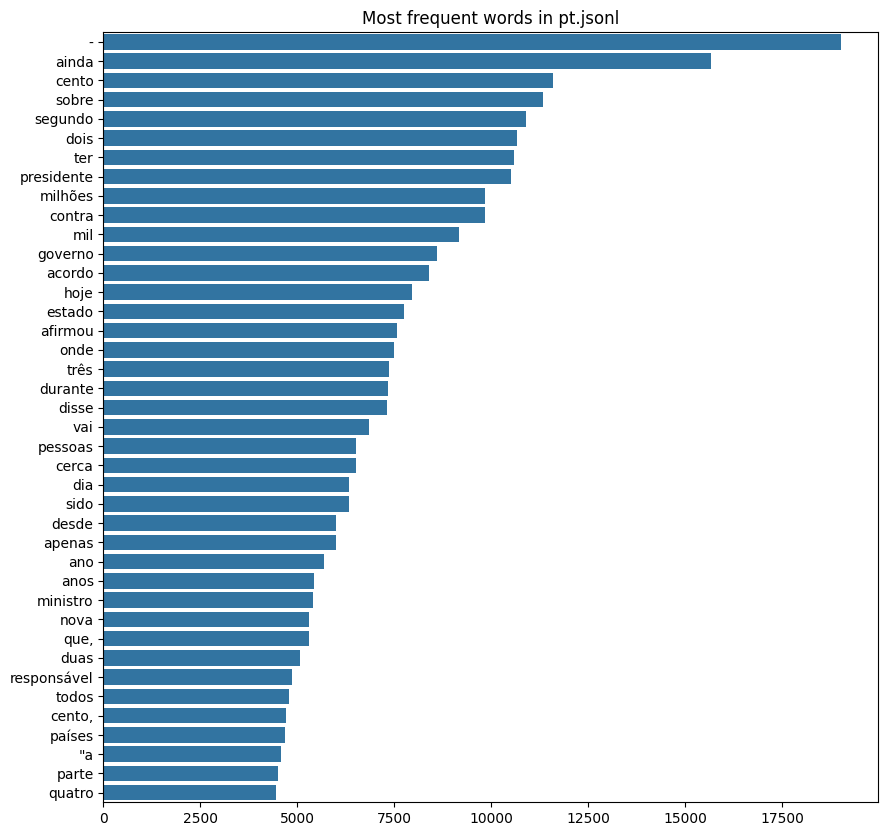

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

most_common_words = word_counts.most_common(40)
plt.figure(figsize=(10, 10))
sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words])
plt.title('Most frequent words in pt.jsonl')
plt.show()


Compute the number of characters to estimate the cost of translating this corpus with Google Cloud Platform.

In [6]:
n_chars = [len(text) for text in texts]
print("Number of characters in pt.jsonl:", sum(n_chars))

Number of characters in pt.jsonl: 41907524


In [7]:
price_per_char = 20 / 1_000_000
print(f"Estimated cost of processing pt.jsonl: {sum(n_chars) * price_per_char:.2f} USD")

Estimated cost of processing pt.jsonl: 838.15 USD
